# Quiz 2: Module Bayesiano para determinar si hay que racionar o no
## Alumno: Yoksan Varela Cambronero
### Cedula: 206100530

### Librerias

In [142]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Para remover Warnings
import warnings
warnings.filterwarnings("ignore")

### **Pregunta #1**: Usando pytorch, use el histograma de los datos anteriores para estimar las densidades p (m1|t = 0), p (m1|t = 1) ,p (m2|t = 0), p (m2|t = 1). m1 = p (primer dimension) y m2 = v (segunda dimension)

De primera entrada, se crean los dos tensores con la informacion original:

In [143]:
# Datos para la variable aleatoria P
P = torch.tensor([[5,6,9,11,12,16,18,13,5,2],[20,13,12,4,2,1,2,1,2,1]],dtype=torch.float32)
print("Variable Aleatoria P:\n",P,"\n")

# Datos para la variable aleatoria V
V = torch.tensor([[2,3,5,15,6,3,1,0,0,0],[22,15,8,3,2,1,0,0,0,0]],dtype=torch.float32)
print("Variable Aleatoria V:\n",V)



Variable Aleatoria P:
 tensor([[ 5.,  6.,  9., 11., 12., 16., 18., 13.,  5.,  2.],
        [20., 13., 12.,  4.,  2.,  1.,  2.,  1.,  2.,  1.]]) 

Variable Aleatoria V:
 tensor([[ 2.,  3.,  5., 15.,  6.,  3.,  1.,  0.,  0.,  0.],
        [22., 15.,  8.,  3.,  2.,  1.,  0.,  0.,  0.,  0.]])


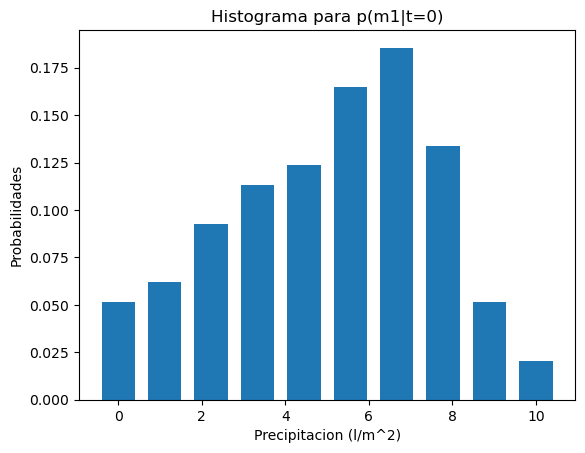

In [144]:
# Creando el histograma para p(m1|t=0)
# Acomondando los bines para que empiecen en cero
bins = torch.linspace(0, 10, 10)
histogram,bins_hist = torch.histogram(bins,bins=10,weight=P[0,:], density=True)
plt.bar(bins,histogram)
plt.xlabel('Precipitacion (l/m^2)')
plt.ylabel('Probabilidades')
plt.title('Histograma para p(m1|t=0)')
plt.show()


Para p(m1|t=0), la distribucion de los datos es Gaussiana con un skew negativo.

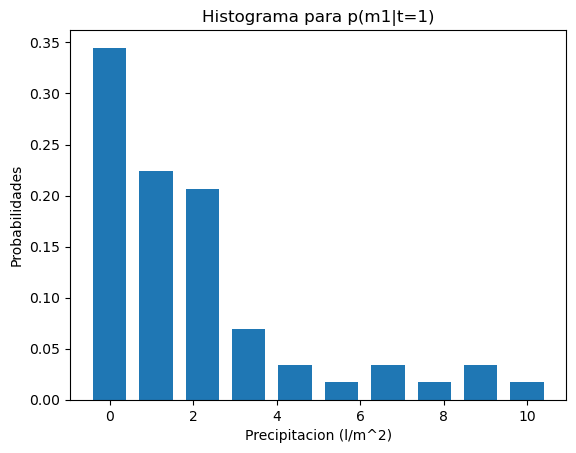

In [145]:
# Creando el histograma para p(m1|t=1)
histogram,bins_hist = torch.histogram(bins,bins=10,weight=P[1,:], density=True)
plt.bar(bins,histogram)
plt.xlabel('Precipitacion (l/m^2)')
plt.ylabel('Probabilidades')
plt.title('Histograma para p(m1|t=1)')
plt.show()

Para p(m1|t=1), la distribucion de los datos es Exponencial.

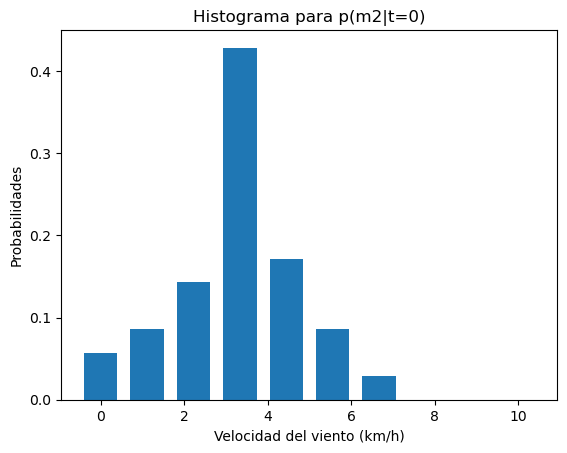

In [146]:
# Creando el histograma para p(m2|t=0)
histogram,bins_hist = torch.histogram(bins,bins=10,weight=V[0,:], density=True)
plt.bar(bins,histogram)
plt.xlabel('Velocidad del viento (km/h)')
plt.ylabel('Probabilidades')
plt.title('Histograma para p(m2|t=0)')
plt.show()

Para p(m2|t=0), la distribucion de los datos es Gaussiana, con una media muy elevada, lo que sugiere que el Kurtosis de esta muestra es pequeno.

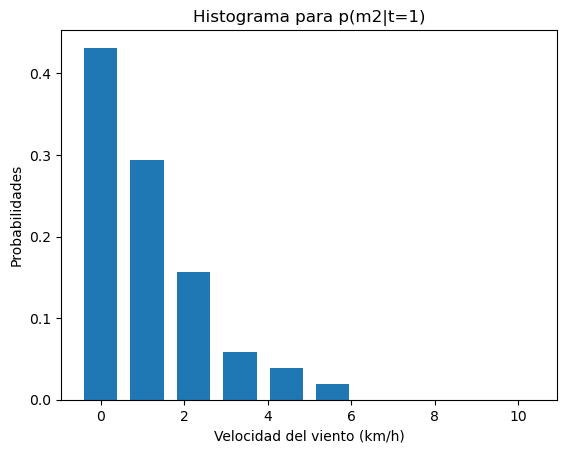

In [147]:
# Creando el histograma para p(m2|t=1)
histogram,bins_hist = torch.histogram(bins,bins=10,weight=V[1,:], density=True)
plt.bar(bins,histogram)
plt.xlabel('Velocidad del viento (km/h)')
plt.ylabel('Probabilidades')
plt.title('Histograma para p(m2|t=1)')
plt.show()

Para p(m2|t=1), la distribucion de los datos es Exponencial.

### **Pregunta #2**: Utilizando los graficos anteriores, ajuste un modelo Gaussiano o exponencial, segun sea necesario (realice la justificacion segun lo observado en tales graficos), a cada una de las densidades p (m1|t = 0), p (m1|t = 1) ,p (m2|t = 0), p (m2|t = 1). Muestre los pasos intermedios para estimar los parametros de tales modelos y documentelos. Grafique el modelo ajustado y muestre las tablas 1 y 2 con las probabilidades estimadas por estos nuevos modelos.

Se crean dos funciones, uno para un modelo Gaussiano y otro para un modelo Exponencial:

In [148]:
def gauss_model(data,mean,sigma):
    fraction = 1/((torch.sqrt(torch.tensor(2 * torch.pi * sigma**2))))
    exponential = torch.exp(torch.tensor((-1/2) * ((data - mean)/sigma)**2))
    prob_gauss = fraction * exponential
    return prob_gauss

In [149]:
def exp_model(data,lambda_dist):
    prob_exp = lambda_dist * torch.exp(torch.tensor(-lambda_dist * data))
    return prob_exp

Ahora se ajustan los modelos usando la informacion de los graficos. Recordar que los bines reflejan la posicion de la VA, no el valor de la VA en si.

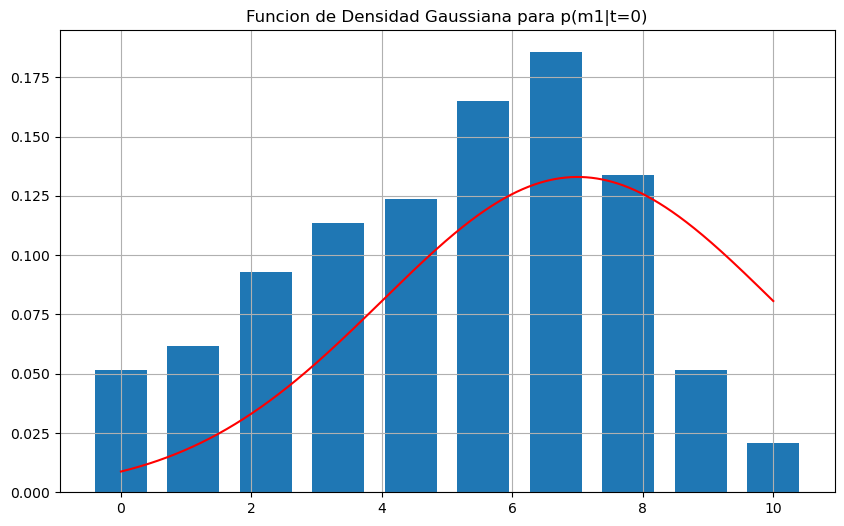

In [150]:
# Funcion de densidad de probabilidad gaussiana de p(m1|t=0)
# Medias y desviacion estandar
p_m1_t0_mean = 7
p_m1_t0_std = 3


# Eje x de la funcion gaussiana
x = np.linspace(0, 10, 1000)

# Creando la funcion de densidad gaussiana
prob_m1_t0_densfunct = gauss_model(x,p_m1_t0_mean,p_m1_t0_std)

# Acomondando los bines para que empiecen en cero
bins = torch.linspace(0, 10, 10)

# Plot the density function
plt.figure(figsize=(10, 6))
histogram,bins_hist = torch.histogram(bins,bins=10,weight=P[0,:], density=True)
plt.bar(bins,histogram)
plt.plot(x, prob_m1_t0_densfunct, label=f'Funcion Gaussiana 1', color='red')
plt.title('Funcion de Densidad Gaussiana para p(m1|t=0)')
plt.grid(True)
plt.show()

El ajuste con mu = 7 y std = 3 provoca que los valores cercanos a la media tengan mas peso, pero a costa de sacrificar los primeros elementos bines, acentuando los efectos de los bines cerca de la media.

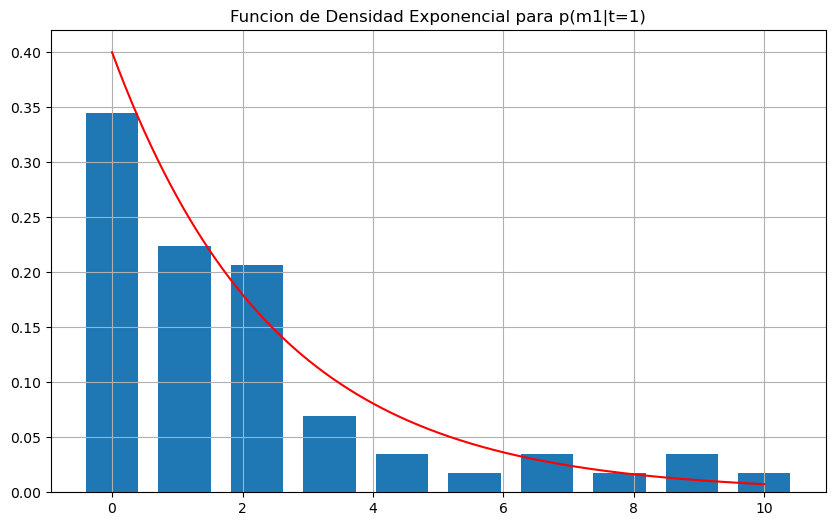

In [151]:
# Funcion de densidad de probabilidad exponencial de p(m1|t=0)
# Lambda para la funcion exponencial
p_m1_t1_lambda = 0.4

# Eje x de la funcion exponencial
x = np.linspace(0, 10, 1000)

# Acomondando los bines para que empiecen en cero
bins = torch.linspace(0, 10, 10)

# Calculando la funcion exponencial
expo = exp_model(x,p_m1_t1_lambda)

# Ploteando la funcion de densidad con el histograma
plt.figure(figsize=(10, 6))
histogram,bins_hist = torch.histogram(bins,bins=10,weight=P[1,:], density=True)
plt.bar(bins,histogram)
plt.plot(x, expo, label=f'Funcion exponencial 1', color='red')
plt.title('Funcion de Densidad Exponencial para p(m1|t=1)')
plt.grid(True)
plt.show()

El ajuste con un lambda = 0.4 muestra tener un buen ajuste a los bines, sacrificando un poco el peso del ultimo, lo cual es aceptable dado que no es un factor que sea considerable.

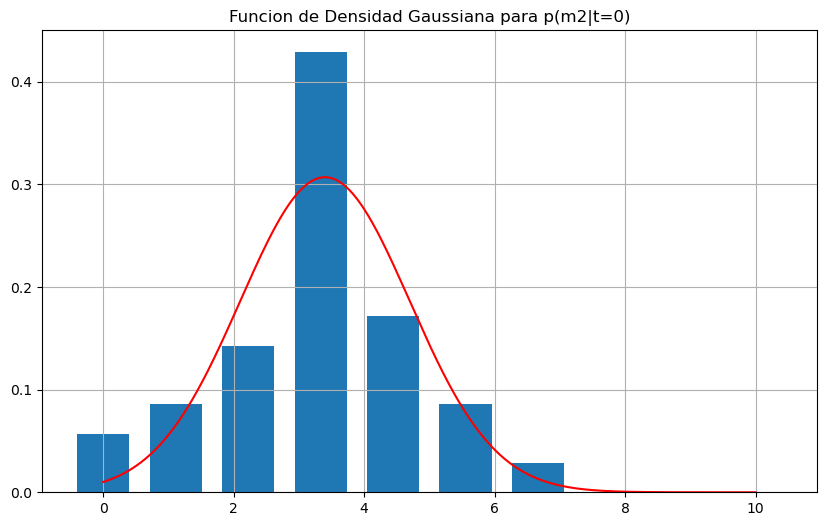

In [152]:
# Funcion de densidad de probabilidad gaussiana de p(m2|t=0)
# Medias y desviacion estandar
p_m2_t0_mean = 3.4
p_m2_t0_std = 1.3

# Eje x de la funcion gaussiana
x = np.linspace(0, 10, 1000)

# Creando la funcion de densidad gaussiana
prob_m2_t0_densfunct = gauss_model(x,p_m2_t0_mean,p_m2_t0_std)

# Acomondando los bines para que empiecen en cero
bins = torch.linspace(0, 10, 10)

# Ploteando la funcion de densidad con el histograma
plt.figure(figsize=(10, 6))
histogram,bins_hist = torch.histogram(bins,bins=10,weight=V[0,:], density=True)
plt.bar(bins,histogram)
plt.plot(x, prob_m2_t0_densfunct, label=f'Funcion Gaussiana 2', color='red')
plt.title('Funcion de Densidad Gaussiana para p(m2|t=0)')
plt.grid(True)
plt.show()

Con un mu = 3.4 y un std = 1.3, se le da un peso importante a la media, lo cual sigue lo visto con los datos, pero minimiza bastante el efecto del bin 1. Para efectos practicos, esta situacion es aceptable.

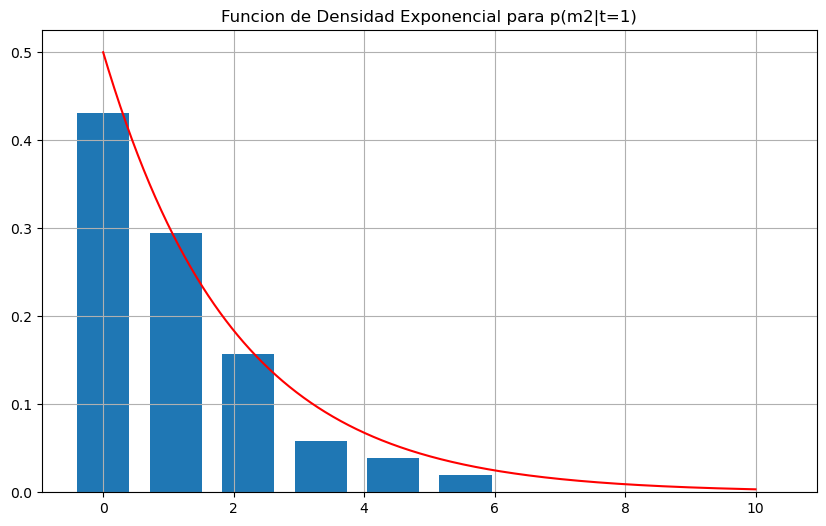

In [153]:
# Funcion de densidad de probabilidad exponencial de p(m2|t=1)
# Lambda para la funcion exponencial
p_m2_t1_lambda = 0.5

# Eje x de la funcion exponencial
x = np.linspace(0, 10, 1000)

# Acomondando los bines para que empiecen en cero
bins = torch.linspace(0, 10, 10)

# Calculando la funcion exponencial
expo = exp_model(x,p_m2_t1_lambda)

# Ploteando la funcion de densidad con el histograma
plt.figure(figsize=(10, 6))
histogram,bins_hist = torch.histogram(bins,bins=10,weight=V[1,:], density=True)
plt.bar(bins,histogram)
plt.plot(x, expo, label=f'Funcion exponencial 2', color='red')
plt.title('Funcion de Densidad Exponencial para p(m2|t=1)')
plt.grid(True)
plt.show()

Un lambda de 0.5 hace un buen modelado de los datos

Ya con los parametros listos, se procede a calcular las nuevas probabilidades:

In [154]:
# Creando los tensores con las probabilidades
prob_P = torch.zeros([2,10])
prob_V = torch.zeros([2,10])

# Creando los bines que van a ser evaluados en las funciones
bins = np.linspace(0,10,10)

# Probabilidades para p(m=1|t=0)
p_m1_t0 = gauss_model(bins,p_m1_t0_mean,p_m1_t0_std)
prob_P[0,:] = p_m1_t0

# Probabilidades para p(m=1|t=1)
p_m1_t1 = exp_model(bins,p_m1_t1_lambda)
prob_P[1,:] = p_m1_t1

# Probabilidades para p(m=1|t=0)
p_m2_t0 = gauss_model(bins,p_m2_t0_mean,p_m2_t0_std)
prob_V[0,:] = p_m2_t0

# Probabilidades para p(m=1|t=0)
p_m2_t1 = exp_model(bins,p_m2_t1_lambda)
prob_V[1,:] = p_m2_t1

# Imprimiendo los resultados
print("Probabilidad de p=m1:\n", prob_P)
print("Probabilidad de v=m2:\n", prob_V)

Probabilidad de p=m1:
 tensor([[0.0087, 0.0194, 0.0374, 0.0630, 0.0925, 0.1184, 0.1322, 0.1286, 0.1091,
         0.0807],
        [0.4000, 0.2565, 0.1644, 0.1054, 0.0676, 0.0433, 0.0278, 0.0178, 0.0114,
         0.0073]])
Probabilidad de v=m2:
 tensor([[1.0038e-02, 6.5134e-02, 2.0358e-01, 3.0648e-01, 2.2223e-01, 7.7616e-02,
         1.3057e-02, 1.0580e-03, 4.1290e-05, 7.7618e-07],
        [5.0000e-01, 2.8688e-01, 1.6460e-01, 9.4438e-02, 5.4184e-02, 3.1088e-02,
         1.7837e-02, 1.0234e-02, 5.8718e-03, 3.3690e-03]])


### **Pregunta #3:** Usando Bayes, estime si habra corte electrico para una entrada m1 = 500 y m2 = 10. Muestre y explique los pasos intermedios.


Ya se tienen todas la probabilidades condicionales: p(m1|t=0), p(m1|t=1), p(m2|t=0) y p(m1|t=1). Para poder aplicar Bayes ingenuo.

Por lo tanto, lo primero que hay que hacer es calcular los tensores para p(t) con las nuevas tablas de probabilidades:

In [155]:
def prob_a_priori(data):
    data_t_0 = data[0,:]
    data_t_1 = data[1,:]
    
    N = torch.sum(data)
    
    return torch.tensor([[torch.sum(data_t_0)/N],[torch.sum(data_t_1)/N]])

In [156]:
# Calculando el tensor con los probabilidades a priori de m1
p_priori_m1 = prob_a_priori(prob_P)
print(p_priori_m1)

# Calculando el tensor con los probabilidades a priori de m2
p_priori_m2 = prob_a_priori(prob_V)
print(p_priori_m2)

tensor([[0.4176],
        [0.5824]])
tensor([[0.4349],
        [0.5651]])


Ya con estos calculos, solo queda hacer una funcion que calcule cual evento t es mas probable con base a valores de las variables aleatorias:

In [157]:
def predecir_evento(va_P_index,va_V_index,value_t,prob_va_P,prob_va_V,prob_t_m1,prob_t_m2):
    # Primera variable aleatoria
    p_m_t_m1 = prob_va_P[value_t,va_P_index]
    p_t_m1 = prob_t_m1[value_t]
    
    # Segunda variable aleatoria
    p_m_t_m2 = prob_va_V[value_t,va_V_index]
    p_t_m2 = prob_t_m2[value_t]
    
    bayes_ingenuo = p_m_t_m1 * p_t_m1 * p_m_t_m2 * p_t_m2
    return bayes_ingenuo

In [163]:
# Indicadores de la variable aleatoria
P_index = 1 # 1 Corresponde a p = 500 l/m^2
V_index = 1 # 1 Corresponde a v = 10 km/h

# Calculando Bayes para t=0
t = 0
evento_t0 = predecir_evento(P_index,V_index,t,prob_P,prob_V,p_priori_m1,p_priori_m2)
print(evento_t0)

# Calculando Bayes para t=1
t = 1
evento_t1 = predecir_evento(P_index,V_index,t,prob_P,prob_V,p_priori_m1,p_priori_m2)
print(evento_t1)

# Por ultimo, se calcula si hay que racionar, donde t = 0 es NO RACIONAR y t = 1 es RACIONAR
if(evento_t0 > evento_t1):
    print("NO es necesario hacer un corte electrico!")
if(evento_t0 <= evento_t1):
    print("SI es necesario hacer un corte electrico!")

tensor([0.0002])
tensor([0.0242])
SI es necesario hacer un corte electrico!
